In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [84]:

file_path = r"C:\Users\achra\Downloads\Strategy RA Research Exercise\Revenue_and_Expenditures_by_State.xlsx"
df = pd.read_excel(file_path)
df = df[df['Entry Type'] != ' Local']
df = df[df['Entry Type'] != ' State']
df.reset_index(drop = True, inplace = True)
df.head()





,Revenue1,Highways,Air transportation (airports),Transit,Expenditure1,Highways.1,Air transportation (airports).1,Transit,Entry Type,State
0,5.731180e+09,19834356.00,19583342.00,8239296.00,4.509102e+09,2.064359e+08,33356115.00,90510988.00,State & local,United States Total
1,4.000000e-02,0.37,0.92,1.08,5.000000e-02,3.100000e-01,0.16,0.35,State & local,United States Total
2,6.362108e+07,12883.00,102978.00,3308.00,5.607430e+07,2.552445e+06,197190.00,79082.00,State & local,Alabama
3,1.700000e-01,2.95,2.33,0.00,2.300000e-01,5.300000e-01,2.58,0.12,State & local,Alabama
4,1.927446e+07,50070.00,170996.00,3461.00,1.640121e+07,1.303421e+06,331616.00,58818.00,State & local,Alaska


In [85]:
df = df[df.index % 2 == 0]
df.reset_index(drop = True, inplace = True)
df.columns.values[7] = 'Transit.1'
numerical_columns = df.select_dtypes(include=['number'])


scaled_numerical_df = numerical_columns * 1000

scaled_df_transport = df.copy()
scaled_df_transport[numerical_columns.columns] = scaled_numerical_df
scaled_df_transport.head()




,Revenue1,Highways,Air transportation (airports),Transit,Expenditure1,Highways.1,Air transportation (airports).1,Transit.1,Entry Type,State,Transit.1
0,5.731180e+12,1.983436e+10,1.958334e+10,8.239296e+09,4.509102e+12,2.064359e+11,3.335612e+10,90510988.0,State & local,United States Total,9.051099e+10
1,6.362108e+10,1.288300e+07,1.029780e+08,3.308000e+06,5.607430e+10,2.552445e+09,1.971900e+08,79082.0,State & local,Alabama,7.908200e+07
2,1.927446e+10,5.007000e+07,1.709960e+08,3.461000e+06,1.640121e+10,1.303421e+09,3.316160e+08,58818.0,State & local,Alaska,5.881800e+07
3,9.625508e+10,2.853000e+07,3.411930e+08,8.275300e+07,7.645073e+10,2.940447e+09,7.431620e+08,932798.0,State & local,Arizona,9.327980e+08
4,4.921405e+10,7.748000e+06,5.668700e+07,1.895000e+06,3.175587e+10,2.196465e+09,1.130600e+08,36063.0,State & local,Arkansas,3.606300e+07
5,9.876285e+11,6.035430e+08,2.979804e+09,1.607784e+09,7.432348e+11,2.376700e+10,5.094272e+09,21373674.0,State & local,California,2.137367e+10


In [167]:
file_name_2 = r'C:\Users\achra\Downloads\Strategy RA Research Exercise\average_poverty_by_state.xlsx'
df_poverty = pd.read_excel(file_name_2, header = None, engine='openpyxl')
new_header = df_poverty.iloc[3]
df_poverty = df_poverty[4:]
df_poverty.columns = new_header
df_poverty.head(50)


3,State,Rate,Margin\nof\nerror1\n(+/-),New Mexico,Mississippi,Louisiana,Arkansas,Oklahoma,Kentucky,West Virginia,...,Massachusetts,Colorado,Vermont,Washington,New Jersey,Nebraska,Wisconsin,Minnesota,New Hampshire,Utah
4,New Mexico,18.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,+,...,+,+,+,+,+,+,+,+,+,+
5,Mississippi,17.8,1.4,NaN,NaN,NaN,NaN,NaN,NaN,+,...,+,+,+,+,+,+,+,+,+,+
6,Louisiana,16.9,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
7,Arkansas,15.8,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
8,Oklahoma,15.8,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
9,Kentucky,15.8,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
10,West Virginia,15.5,1.6,-,-,NaN,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
11,Alabama,14.8,1.6,-,-,-,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
12,District of Columbia,14.7,1.4,-,-,-,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
13,Texas,13.7,0.7,-,-,-,-,-,-,-,...,+,+,+,+,+,+,+,+,+,+


In [99]:

file_name_3 = r"C:\Users\achra\Downloads\Strategy RA Research Exercise\US_REALGDPPERCAPITABYSTATE2022.xlsx"

GDP_per_capita = pd.read_excel(file_name_3, skiprows=4)
GDP_per_capita = GDP_per_capita.drop(labels= ['Unnamed: 0'], axis = 1)

print(GDP_per_capita.head(10))

                  State  Real_GDP_Per_Capita
0  District of Columbia            192419.80
1              New York             79434.45
2         Massachusetts             77896.55
3            Washington             74773.65
4            California             73934.82
5           Connecticut             69641.21
6          North Dakota             68174.08
7                Alaska             67659.28
8              Colorado             66068.44
9              Delaware             64567.03


In [115]:
file_name_4 = r"C:\Users\achra\Downloads\Strategy RA Research Exercise\Gini_Coefficient_by_state.xlsx"

Gini_coefficient = pd.read_excel(file_name_4, skiprows=1)
Gini_coefficient = Gini_coefficient.drop(labels = ['Unnamed: 0', 'Unnamed: 1'], axis = 1)
Gini_coefficient.head(9)

,State,Gini_Index
0,Puerto Rico,0.55
1,New York,0.52
2,District of Columbia,0.51
3,Connecticut,0.50
4,Massachusetts,0.50
5,California,0.50
6,Louisiana,0.49
7,Florida,0.49
8,Alabama,0.49


In [120]:
file_name_5 = r"C:\Users\achra\Downloads\Strategy RA Research Exercise\Unemployment_by_state_2022.xlsx"
Unemployment =  pd.read_excel(file_name_5)
Unemployment = Unemployment.drop(labels = ['Unnamed: 0'], axis = 1)
Unemployment.head()

,State,Percent_Unemployment
0,Nevada,5.4
1,District of Columbia,4.7
2,Illinois,4.6
3,Delaware,4.5
4,Pennsylvania,4.4


In [143]:
df_merged = scaled_df_transport.merge(df_poverty, on='State', how='outer')
df_merged = df_merged.merge(GDP_per_capita, on='State', how='outer')
df_merged = df_merged.merge(Gini_coefficient, on='State', how='outer')
df_merged = df_merged.merge(Unemployment, on='State', how='outer')
start_col = df_merged.columns.get_loc('State') + 1  
end_col = df_merged.columns.get_loc('Real_GDP_Per_Capita')

columns_to_drop = df_merged.columns[start_col:end_col]


df_merged = df_merged.drop(columns=columns_to_drop)
df_merged.dropna(inplace = True)
df_merged.head()

,Revenue1,Highways,Air transportation (airports),Transit,Expenditure1,Highways.1,Air transportation (airports).1,Entry Type,State,Real_GDP_Per_Capita,Gini_Index,Percent_Unemployment
1,6.362108e+10,12883000.0,1.029780e+08,3.308000e+06,5.607430e+10,2.552445e+09,1.971900e+08,State & local,Alabama,42028.45,0.49,2.6
2,1.927446e+10,50070000.0,1.709960e+08,3.461000e+06,1.640121e+10,1.303421e+09,3.316160e+08,State & local,Alaska,67659.28,0.43,4.0
3,9.625508e+10,28530000.0,3.411930e+08,8.275300e+07,7.645073e+10,2.940447e+09,7.431620e+08,State & local,Arizona,48431.51,0.47,3.8
4,4.921405e+10,7748000.0,5.668700e+07,1.895000e+06,3.175587e+10,2.196465e+09,1.130600e+08,State & local,Arkansas,41545.40,0.48,3.3
5,9.876285e+11,603543000.0,2.979804e+09,1.607784e+09,7.432348e+11,2.376700e+10,5.094272e+09,State & local,California,73934.82,0.50,4.2


In [162]:
df_merged.columns = df_merged.columns.str.strip()
df_merged.columns


Index(['Revenue1', 'Highways', 'Air transportation (airports)', 'Transit',
       'Expenditure1', 'Highways.1', 'Air transportation (airports).1',
       'Entry Type', 'State', 'Real_GDP_Per_Capita', 'Gini_Index',
       'Percent_Unemployment'],
      dtype='object')

In [178]:
df_merged["Percent_Highways"] = (df_merged["Highways.1"] / df_merged["Expenditure1"] * 100).round(2)
df_merged["Percent_Airports"] = (df_merged["Air transportation (airports)"] / df_merged["Expenditure1"] * 100).round(2)
df_merged["Percent_Transit"] = (df_merged["Transit"] / df_merged["Expenditure1"] * 100).round(2)
df_merged["Transportation_Spending_Percent"] = df_merged["Percent_Transit"] + df_merged["Percent_Airports"] + df_merged["Percent_Highways"]
df_merged['Poverty_Rate'] = df_poverty['Rate']


df_merged.iat[0, df_merged.columns.get_loc('Poverty_Rate')] = 14.8
df_merged.iat[1, df_merged.columns.get_loc('Poverty_Rate')] = 11.5
df_merged.iat[2, df_merged.columns.get_loc('Poverty_Rate')] = 12.1
df_merged

,Revenue1,Highways,Air transportation (airports),Transit,Expenditure1,Highways.1,Air transportation (airports).1,Entry Type,State,Real_GDP_Per_Capita,Gini_Index,Percent_Unemployment,Percent_Highways,Percent_Airports,Percent_Transit,Transportation_Spending_Percent,Poverty_Rate
1,6.362108e+10,1.288300e+07,1.029780e+08,3.308000e+06,5.607430e+10,2.552445e+09,1.971900e+08,State & local,Alabama,42028.45,0.49,2.6,4.55,0.18,0.01,4.74,14.8
2,1.927446e+10,5.007000e+07,1.709960e+08,3.461000e+06,1.640121e+10,1.303421e+09,3.316160e+08,State & local,Alaska,67659.28,0.43,4.0,7.95,1.04,0.02,9.01,11.5
3,9.625508e+10,2.853000e+07,3.411930e+08,8.275300e+07,7.645073e+10,2.940447e+09,7.431620e+08,State & local,Arizona,48431.51,0.47,3.8,3.85,0.45,0.11,4.41,12.1
4,4.921405e+10,7.748000e+06,5.668700e+07,1.895000e+06,3.175587e+10,2.196465e+09,1.130600e+08,State & local,Arkansas,41545.40,0.48,3.3,6.92,0.18,0.01,7.11,18.3
5,9.876285e+11,6.035430e+08,2.979804e+09,1.607784e+09,7.432348e+11,2.376700e+10,5.094272e+09,State & local,California,73934.82,0.50,4.2,3.20,0.40,0.22,3.82,17.8
6,9.370610e+10,2.818780e+08,7.390740e+08,1.057550e+08,7.925512e+10,3.602457e+09,1.480684e+09,State & local,Colorado,66068.44,0.46,3.0,4.55,0.93,0.13,5.61,16.9
7,7.340716e+10,2.081900e+07,2.942800e+07,4.624700e+07,4.703147e+10,2.157939e+09,3.237400e+07,State & local,Connecticut,69641.21,0.50,4.2,4.59,0.06,0.10,4.75,15.8
8,2.023997e+10,3.434910e+08,7.752000e+06,1.055100e+07,1.447884e+10,8.039130e+08,8.189000e+06,State & local,Delaware,64567.03,0.44,4.5,5.55,0.05,0.07,5.67,15.8
9,1.959564e+10,1.437000e+06,0.000000e+00,1.627250e+08,2.255226e+10,6.712190e+08,0.000000e+00,State & local,District of Columbia,192419.80,0.51,4.7,2.98,0.00,0.72,3.70,15.8
10,2.739818e+11,2.097060e+09,2.093119e+09,1.856910e+08,2.254725e+11,1.213037e+10,3.620779e+09,State & local,Florida,48142.90,0.49,2.9,5.38,0.93,0.08,6.39,15.5


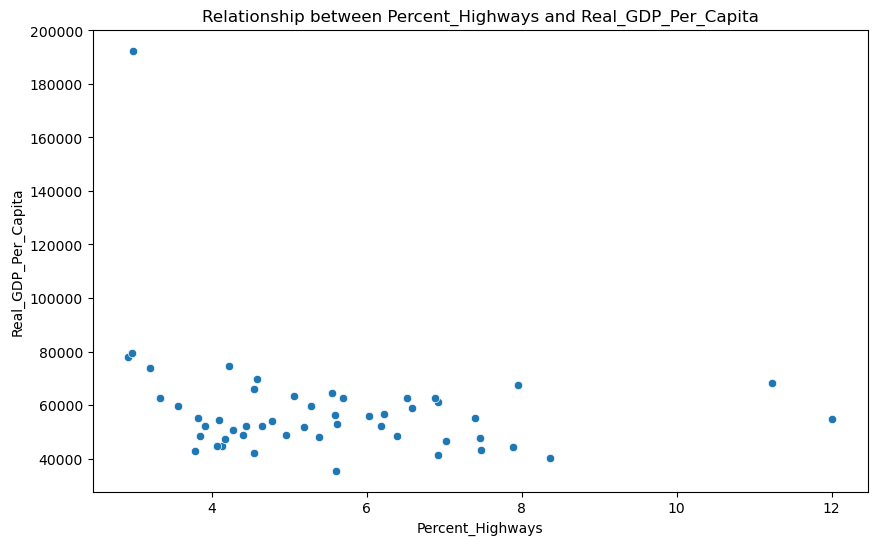

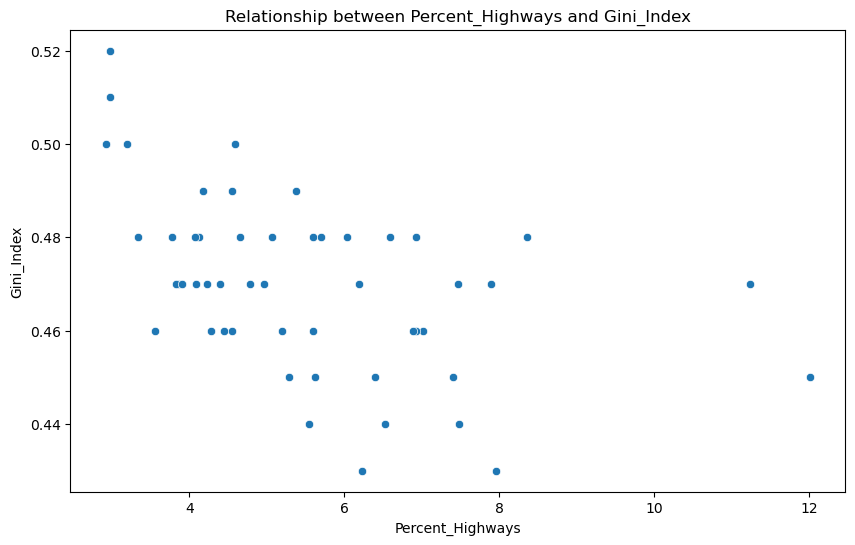

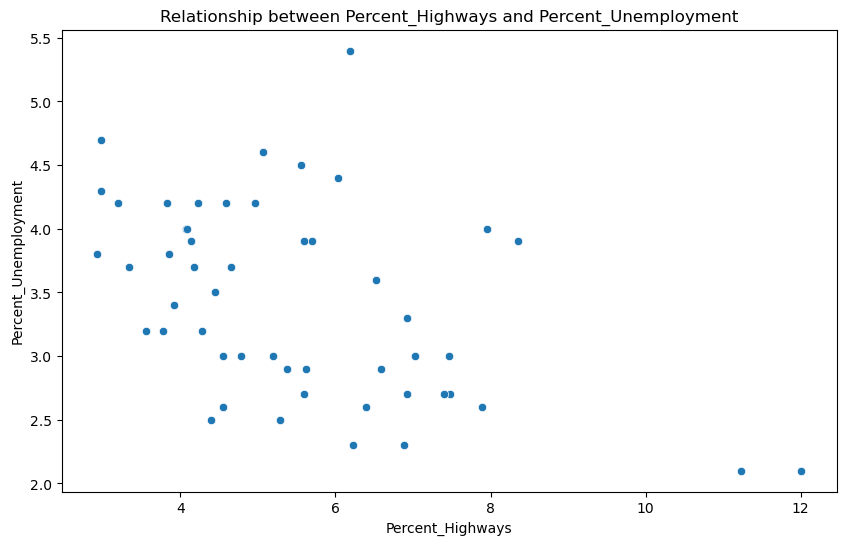

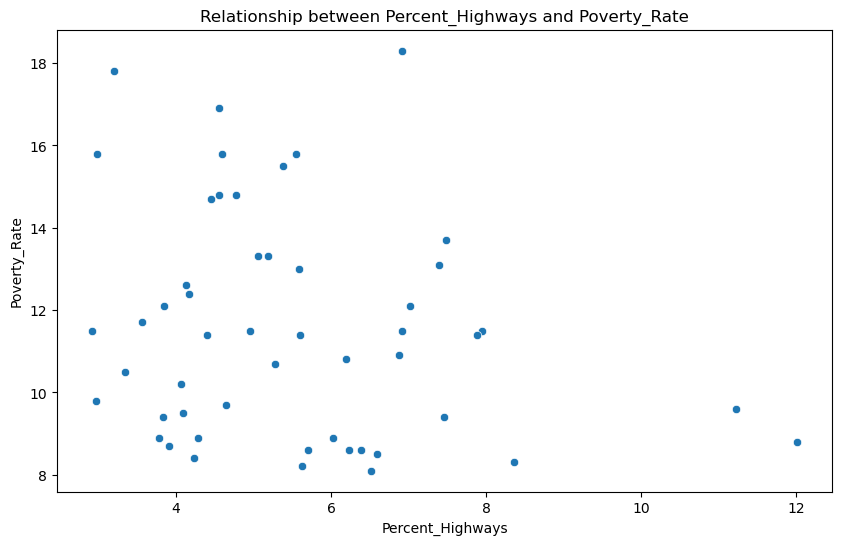

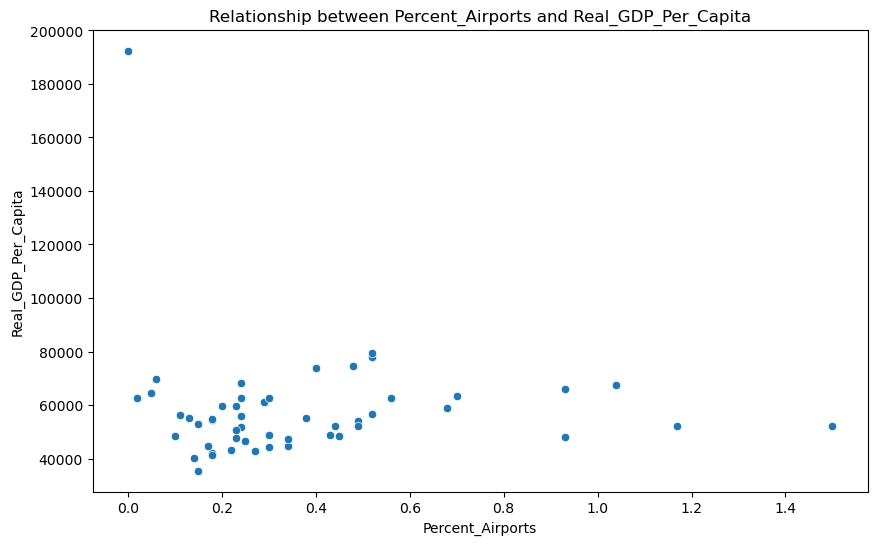

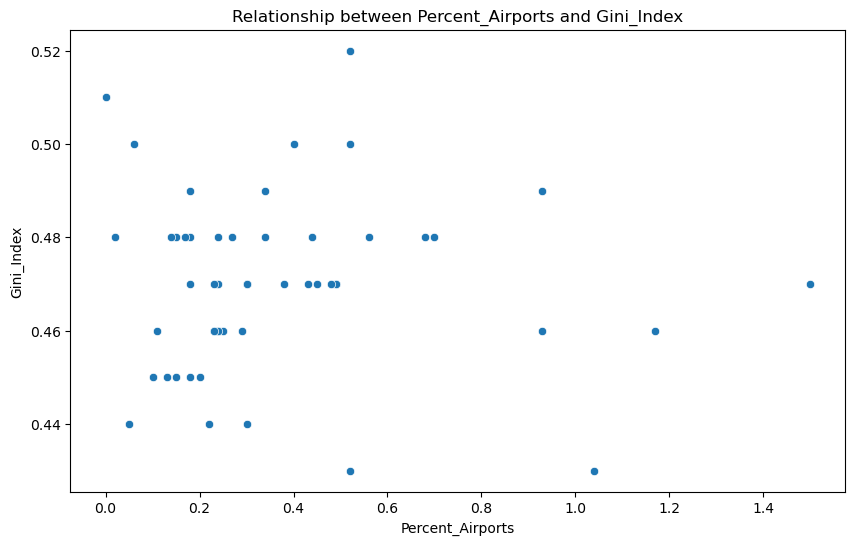

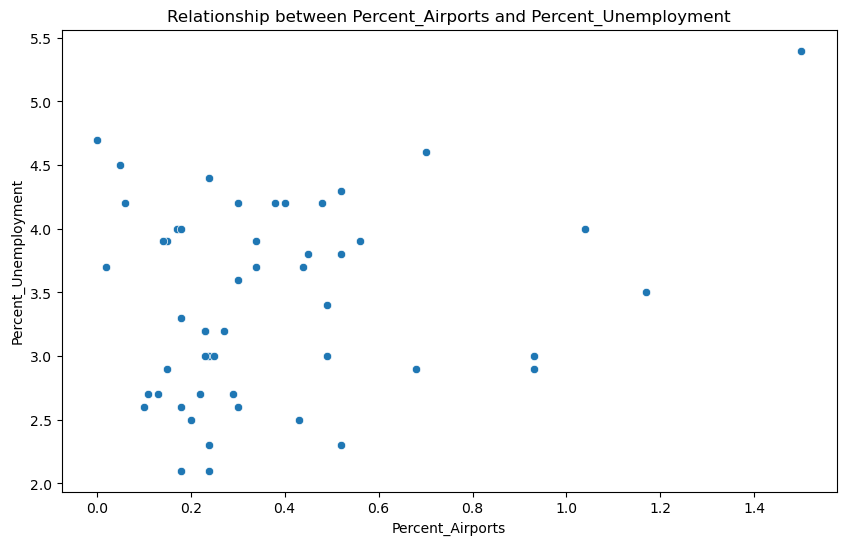

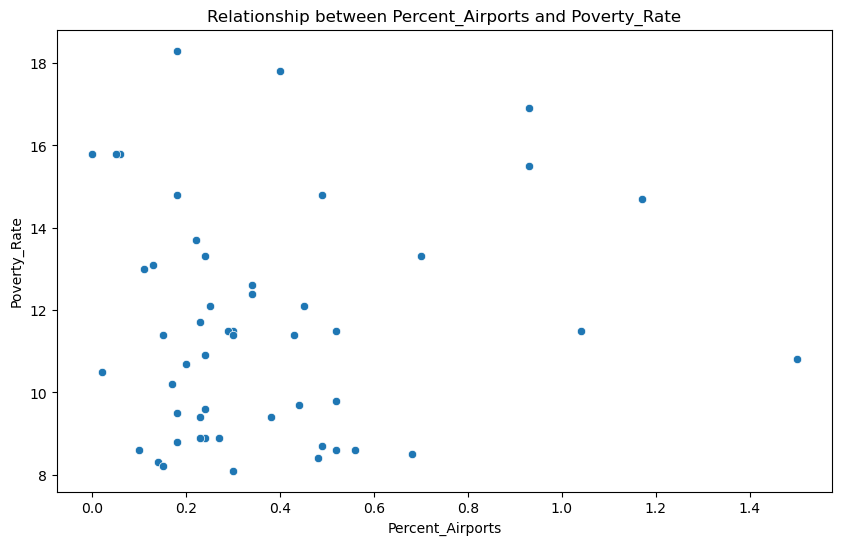

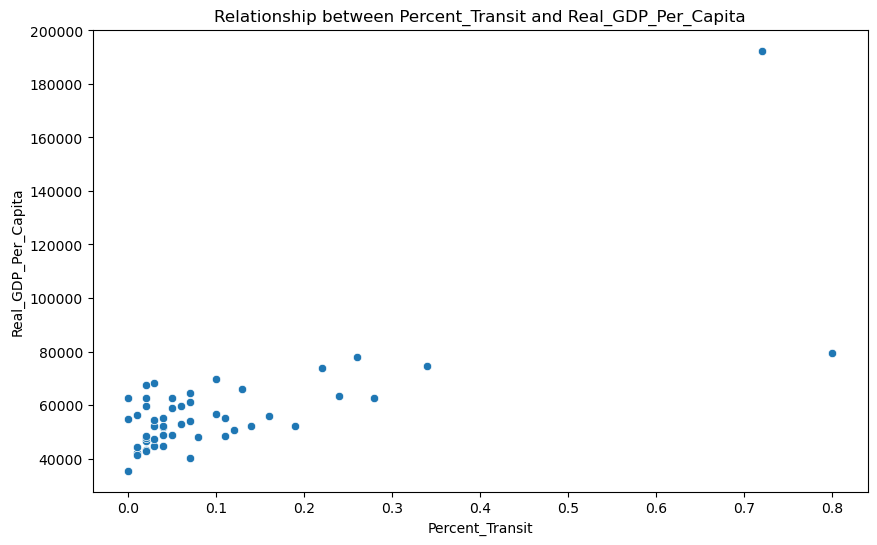

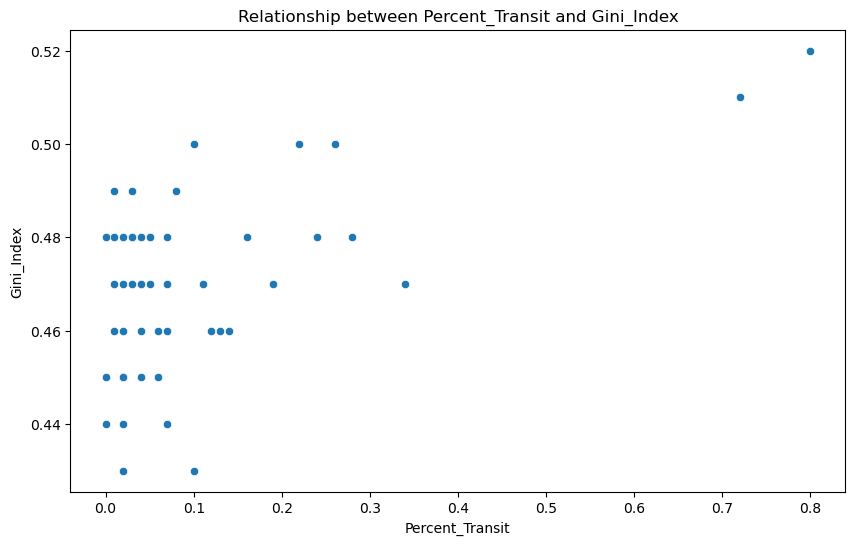

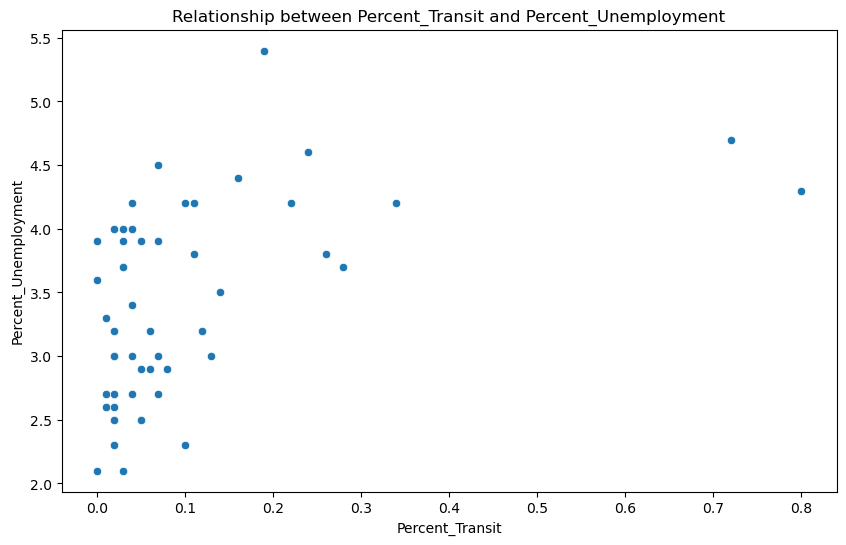

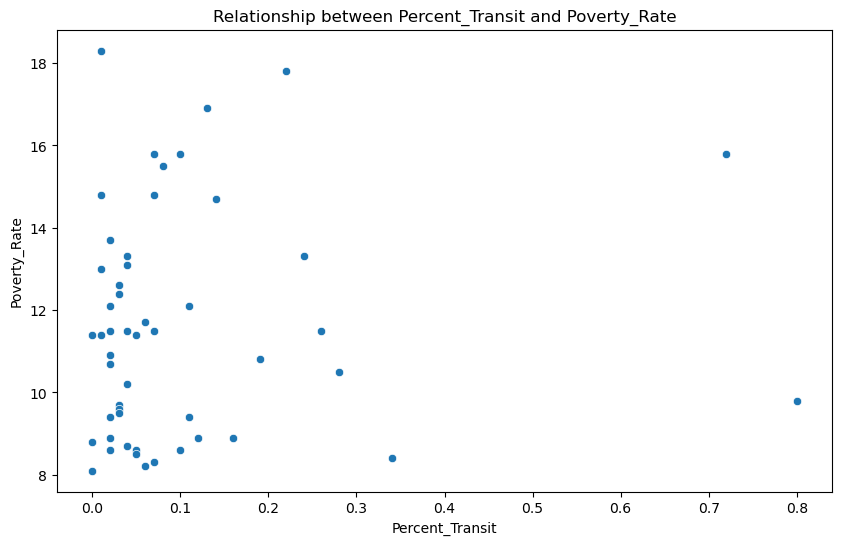

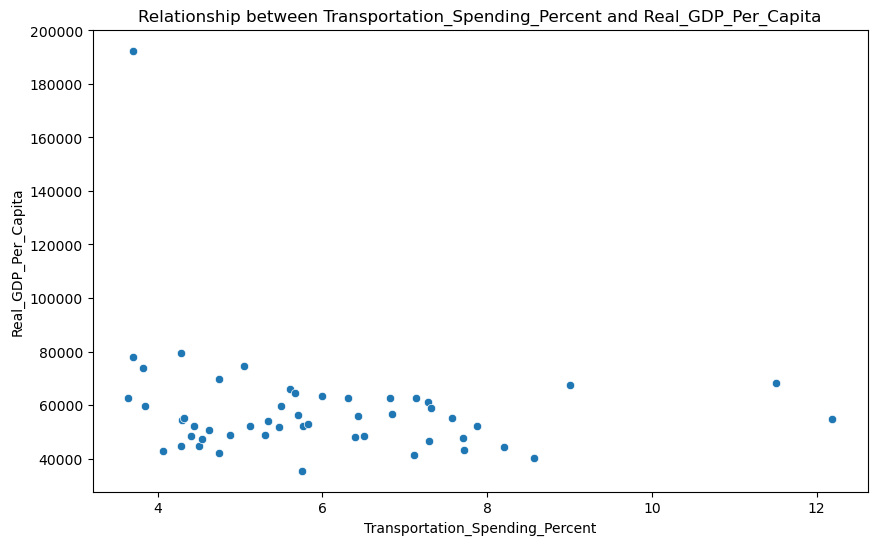

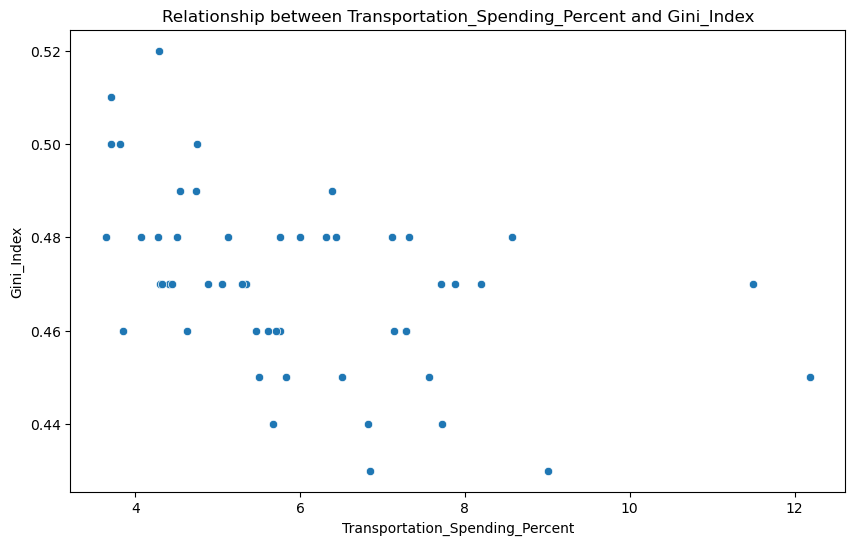

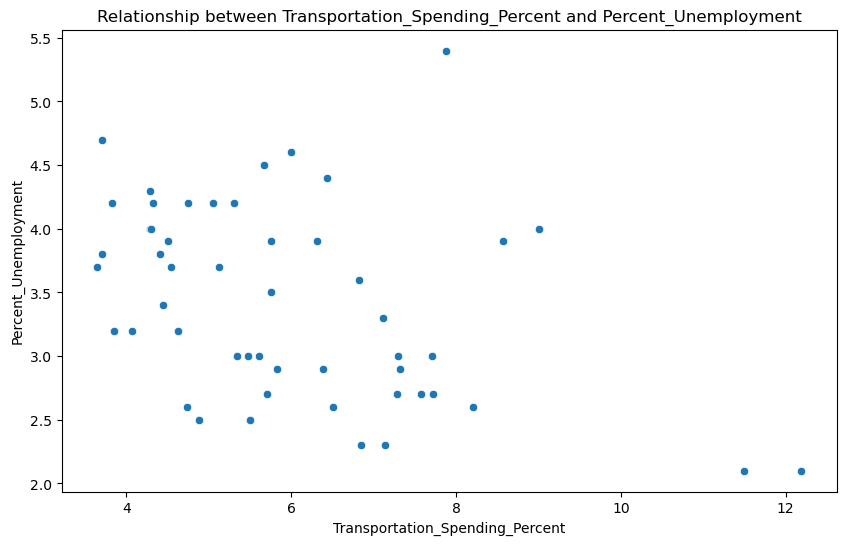

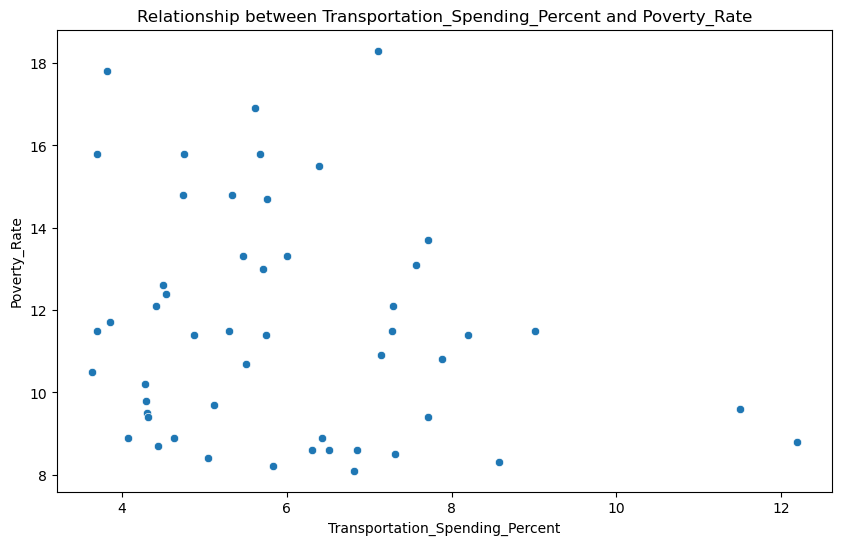

In [181]:
def create_scatter_plot(df, x_var, y_vars):
    for y_var in y_vars:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=x_var, y=y_var)
        plt.title(f'Relationship between {x_var} and {y_var}')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.show()


ivs = ['Percent_Highways', 'Percent_Airports', 'Percent_Transit', 'Transportation_Spending_Percent']


dvs = ['Real_GDP_Per_Capita', 'Gini_Index', 'Percent_Unemployment', 'Poverty_Rate']


for iv in ivs:
    create_scatter_plot(df_merged, iv, dvs)

In [288]:
X= df_merged[['Percent_Highways', 'Percent_Airports', 'Percent_Transit']]
Y1 = df_merged[['Real_GDP_Per_Capita']]

X_with_constant1 = sm.add_constant(X)

model_ols1 = sm.OLS(Y1, X_with_constant1)

results1 = model_ols1.fit()
summary1 = results1.summary()
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Real_GDP_Per_Capita   R-squared:                       0.562
Model:                             OLS   Adj. R-squared:                  0.534
Method:                  Least Squares   F-statistic:                     20.07
Date:                 Sun, 26 Nov 2023   Prob (F-statistic):           1.62e-08
Time:                         03:06:21   Log-Likelihood:                -559.99
No. Observations:                   51   AIC:                             1128.
Df Residuals:                       47   BIC:                             1136.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              4.43e+04   8219.291      5.390      0.000    2.78e+04    6.08e+04
Percent_Highways  1151.3660   1224.041      0.941      0.352   -1311.087    3613.819
Percent_Airports -1.032e+04   6956.171     -1.483      0.145   -2.43e+04    3677.230
Percent_Transit   1.099e+05    1.5e+04      7.316      0.000    7.97e+04     1.4e+05
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.723
Skew:                           1.053   Prob(JB):                     4.27e-44
Kurtosis:                      12.463   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
Y2 = df_merged[['Gini_Index']]

X_with_constant2 = sm.add_constant(X)


model_ols2 = sm.OLS(Y2, X_with_constant2)


results2 = model_ols2.fit()
summary2 = results2.summary()
summary2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gini_Index   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     9.769
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.02e-05
Time:                        03:06:30   Log-Likelihood:                 142.70
No. Observations:                  51   AIC:                            -277.4
Df Residuals:                      47   BIC:                            -269.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4826      0.009     56.559      0.000       0.465       0.500
Percent_Highways    -0.0029      0.001     -2.273      0.028      -0.005      -0.000
Percent_Airports    -0.0057      0.007     -0.795      0.431      -0.020       0.009
Percent_Transit      0.0535      0.016      3.430      0.001       0.022       0.085
==============================================================================
Omnibus:                        1.597   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.480
Skew:                          -0.299   Prob(JB):                        0.477
Kurtosis:                       2.417   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
Y3 = df_merged[['Poverty_Rate']].astype('float64')

X_with_constant3 = sm.add_constant(X)


model_ols3 = sm.OLS(Y3, X_with_constant3)


results3 = model_ols3.fit()
summary3 = results3.summary()
summary3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Poverty_Rate   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8174
Date:                Sun, 26 Nov 2023   Prob (F-statistic):              0.491
Time:                        03:06:33   Log-Likelihood:                -122.01
No. Observations:                  51   AIC:                             252.0
Df Residuals:                      47   BIC:                             259.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.9783      1.532      8.473      0.000       9.897      16.060
Percent_Highways    -0.2986      0.228     -1.309      0.197      -0.758       0.160
Percent_Airports     0.5990      1.296      0.462      0.646      -2.009       3.207
Percent_Transit      0.0599      2.799      0.021      0.983      -5.572       5.691
==============================================================================
Omnibus:                        4.127   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.970
Skew:                           0.666   Prob(JB):                        0.137
Kurtosis:                       2.692   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
Y4 = df_merged[['Percent_Unemployment']]

model4 = LinearRegression()

X_with_constant4 = sm.add_constant(X)


model_ols4 = sm.OLS(Y4, X_with_constant4)


results4 = model_ols4.fit()
summary4 = results4.summary()
summary4


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Percent_Unemployment   R-squared:                       0.358
Model:                              OLS   Adj. R-squared:                  0.317
Method:                   Least Squares   F-statistic:                     8.725
Date:                  Sun, 26 Nov 2023   Prob (F-statistic):           0.000104
Time:                          03:06:35   Log-Likelihood:                -46.697
No. Observations:                    51   AIC:                             101.4
Df Residuals:                        47   BIC:                             109.1
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8096      0.350     10.890      0.000       3.106       4.513
Percent_Highways    -0.1312      0.052     -2.519      0.015      -0.236      -0.026
Percent_Airports     0.4827      0.296      1.630      0.110      -0.113       1.078
Percent_Transit      1.5633      0.639      2.445      0.018       0.277       2.849
==============================================================================
Omnibus:                        2.739   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.191
Skew:                           0.368   Prob(JB):                        0.334
Kurtosis:                       2.301   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
r_squared1 = results1.rsquared
print("R-squared:", r_squared1)
r_squared2 = results2.rsquared
print("R-squared:", r_squared2)
r_squared3 = results3.rsquared
print("R-squared:", r_squared3)
r_squared4 = results4.rsquared
print("R-squared:", r_squared4)

R-squared: 0.5616649883806739
R-squared: 0.3840695075739332
R-squared: 0.049585643515804745
R-squared: 0.3576924781630981


In [308]:
file_path_csv = r"C:\Users\achra\Downloads\Strategy RA Research Exercise\Real_GDP_over_time_by_state.csv"


df_csv = pd.read_csv(file_path_csv)


df_csv.head()
df_real_gdp = df_csv[df_csv['Description'].str.contains("Real GDP", na=False)]
df_real_gdp = df_real_gdp[['GeoName', '2017', '2018', '2019', '2021']]


df_real_gdp.head(20)
df_real_gdp_over_time = df_real_gdp.reset_index(drop = True)
mapping = {'GeoName': "State"}
df_real_gdp_over_time = df_real_gdp_over_time.rename(mapper = mapping, axis = 1)
df_real_gdp_over_time.head()

,State,2017,2018,2019,2021
0,United States,19612102.0,20193896.0,20692087.0,21407692.0
1,Alabama,216615.5,220808.8,224944.6,231892.6
2,Alaska,53550.9,52479.6,52325.3,51021.8
3,Arizona,333099.0,346398.3,359645.7,390805.2
4,Arkansas,123882.6,126371.2,127216.0,135568.8


In [309]:
excel_file_path = r"C:\Users\achra\Downloads\Strategy RA Research Exercise\2017_to_2021.xlsx"

xls = pd.ExcelFile(excel_file_path)
sheet_names = xls.sheet_names

dfs = {}

for sheet in sheet_names:
    dfs[sheet] = pd.read_excel(xls, sheet)

for sheet, df in dfs.items():
    print(f"First few rows of sheet: {sheet}")
    print(df.head(), "\n")

First few rows of sheet: 2021
               Revenue1                 Highways  \
0          5.731180e+09              19834356.00   
1          4.000000e-02                     0.37   
2          3.975040e+09              11748201.00   
3          2.395165e+09               8086155.00   
4          1.100000e-01                     0.91   

                  Air transportation (airports)       Transit  \
0                                   19583342.00    8239296.00   
1                                          0.92          1.08   
2                                    1303538.00    1685251.00   
3                                   18279804.00    6554045.00   
4                                          0.99          1.36   

              Expenditure1                 Highways.1  \
0             4.509102e+09               2.064359e+08   
1             5.000000e-02               3.100000e-01   
2             2.965009e+09               1.218347e+08   
3             2.219366e+09            

In [324]:


for sheet, df in dfs.items():
    year = sheet.strip()  
    df.rename(columns=lambda x: x + "_" + year if x != 'State' else x, inplace=True)


df_real_gdp_over_time = df_real_gdp.rename(columns=lambda x: x if x == 'GeoName' else x + "_real_gdp")


for sheet, df in dfs.items():
    df_real_gdp_over_time = df_real_gdp_over_time.merge(df, left_on='GeoName', right_on='State', how='left')

df_real_gdp_over_time.head()

C:\Users\achra\AppData\Local\Temp\ipykernel_37732\2737191460.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_real_gdp_over_time = df_real_gdp_over_time.merge(df, left_on='GeoName', right_on='State', how='left')


,GeoName,2017_real_gdp,2018_real_gdp,2019_real_gdp,2021_real_gdp,Revenue1_2021_2021_2021_2021_2021,Highways_2021_2021_2021_2021_2021,Air transportation (airports)_2021_2021_2021_2021_2021,Transit_2021_2021_2021_2021_2021,Expenditure1_2021_2021_2021_2021_2021,...,Expenditure1_2017_2017_2017_2017_2017,Highways.1_2017_2017_2017_2017_2017,Air transportation (airports).1_2017_2017_2017_2017_2017,Transit_2017_2017_2017_2017_2017,State_y,Entry Type_2017_2017_2017_2017_2017,% Highways_2017_2017_2017_2017_2017,% Air transportation_2017_2017_2017_2017_2017,% Transit_2017_2017_2017_2017_2017,% Transportation_2017_2017_2017_2017_2017
0,United States,19612102.0,20193896.0,20692087.0,21407692.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,216615.5,220808.8,224944.6,231892.6,63621075.00,12883.00,102978.00,3308.0,56074297.00,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
2,Alabama,216615.5,220808.8,224944.6,231892.6,0.17,2.95,2.33,0.0,0.23,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
3,Alabama,216615.5,220808.8,224944.6,231892.6,43769959.00,1336.00,0.00,0.0,39583700.00,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
4,Alabama,216615.5,220808.8,224944.6,231892.6,27851257.00,11547.00,102978.00,3308.0,26692398.00,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068


In [325]:
df_cleaned = df_real_gdp_over_time[df_real_gdp_over_time['GeoName'] != 'United States']


df_cleaned = df_cleaned.drop_duplicates()


df_cleaned = df_cleaned.fillna(0)


df_cleaned.head()

,GeoName,2017_real_gdp,2018_real_gdp,2019_real_gdp,2021_real_gdp,Revenue1_2021_2021_2021_2021_2021,Highways_2021_2021_2021_2021_2021,Air transportation (airports)_2021_2021_2021_2021_2021,Transit_2021_2021_2021_2021_2021,Expenditure1_2021_2021_2021_2021_2021,...,Expenditure1_2017_2017_2017_2017_2017,Highways.1_2017_2017_2017_2017_2017,Air transportation (airports).1_2017_2017_2017_2017_2017,Transit_2017_2017_2017_2017_2017,State_y,Entry Type_2017_2017_2017_2017_2017,% Highways_2017_2017_2017_2017_2017,% Air transportation_2017_2017_2017_2017_2017,% Transit_2017_2017_2017_2017_2017,% Transportation_2017_2017_2017_2017_2017
1,Alabama,216615.5,220808.8,224944.6,231892.6,63621075.00,12883.00,102978.00,3308.0,56074297.00,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
2,Alabama,216615.5,220808.8,224944.6,231892.6,0.17,2.95,2.33,0.0,0.23,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
3,Alabama,216615.5,220808.8,224944.6,231892.6,43769959.00,1336.00,0.00,0.0,39583700.00,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
4,Alabama,216615.5,220808.8,224944.6,231892.6,27851257.00,11547.00,102978.00,3308.0,26692398.00,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068
5,Alabama,216615.5,220808.8,224944.6,231892.6,0.39,3.29,2.33,0.0,0.48,...,47236677.0,2486023.0,137606.0,72087.0,Alabama,State & local,0.052629,0.002913,0.001526,0.057068


In [327]:

mapping = {'GeoName': "State"}
df_cleaned = df_cleaned.rename(mapper = mapping, axis = 1)
df_grouped = df_cleaned.groupby('State').mean()


df_grouped.reset_index(inplace=True)


df_grouped.columns = df_grouped.columns.str.replace(r'(_\d+|\.\d+)', '', regex=True)
df_grouped.columns = df_grouped.columns.str.replace('_', ' ')



C:\Users\achra\AppData\Local\Temp\ipykernel_37732\685733023.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_cleaned.groupby('State').mean()


,State,2017 real gdp,2018 real gdp,2019 real gdp,2021 real gdp,Revenue1,Highways,Air transportation (airports),Transit,Expenditure1,...,Air transportation (airports),Transit,Expenditure1,Highways,Air transportation (airports),Transit,% Highways,% Air transportation,% Transit,% Transportation
0,Alabama,216615.5,220808.8,224944.6,231892.6,2.704846e+07,5154.448,41192.132,1323.200,2.447008e+07,...,121591.0,5229.0,47236677.0,2486023.0,137606.0,72087.0,0.052629,0.002913,0.001526,0.057068
1,Alaska,53550.9,52479.6,52325.3,51021.8,8.141407e+06,20036.638,68398.704,1384.400,7.072193e+06,...,192599.0,6487.0,14957472.0,1412550.0,376461.0,50601.0,0.094438,0.025169,0.003383,0.122989
2,Arizona,333099.0,346398.3,359645.7,390805.2,4.064922e+07,11413.014,136477.220,33101.324,3.282451e+07,...,488679.0,134412.0,60140105.0,2560715.0,529059.0,761110.0,0.042579,0.008797,0.012656,0.064032
3,Arkansas,123882.6,126371.2,127216.0,135568.8,2.081805e+07,3104.432,22675.588,758.000,1.413670e+07,...,77640.0,3497.0,27702361.0,2038261.0,111893.0,29864.0,0.073577,0.004039,0.001078,0.078694
4,California,2740550.3,2850970.3,2962792.1,3146185.3,4.220224e+08,241418.074,1191922.164,643115.612,3.216310e+08,...,3933049.0,2310641.0,569661386.0,16441059.0,4653418.0,15003450.0,0.028861,0.008169,0.026337,0.063367


In [329]:
gdp_columns = ['2017 real gdp', '2018 real gdp', '2019 real gdp', '2021 real gdp']
for col in gdp_columns:
    df_grouped[col] = df_grouped[col] * 100
df_grouped.head()
df.columns

Index(['            Revenue1_2017_2017_2017_2017_2017',
       '               Highways_2017_2017_2017_2017_2017',
       '               Air transportation (airports)_2017_2017_2017_2017_2017',
       '     Transit_2017_2017_2017_2017_2017',
       '           Expenditure1_2017_2017_2017_2017_2017',
       '               Highways.1_2017_2017_2017_2017_2017',
       '               Air transportation (airports).1_2017_2017_2017_2017_2017',
       '          Transit_2017_2017_2017_2017_2017', 'State',
       'Entry Type_2017_2017_2017_2017_2017',
       '% Highways_2017_2017_2017_2017_2017',
       '% Air transportation_2017_2017_2017_2017_2017',
       '% Transit_2017_2017_2017_2017_2017',
       '% Transportation_2017_2017_2017_2017_2017'],
      dtype='object')

In [337]:
predictors = ['% Highways', '% Air transportation', '% Transit', '% Transportation']
response_vars = ['Gini index', 'real GDP', 'poverty', 'unemployment'] 

train_test_data = {}
for year in ['2017', '2018', '2019', '2021']:
    response_var = f'{year} real gdp'
    train_test_data[year] = train_test_split(df_grouped[predictors], df_grouped[response_var], test_size=0.2, random_state=42)


models_metrics = {}

for year, data in train_test_data.items():
    X_train, X_test, y_train, y_test = data
    model = LinearRegression()
    model.fit(X_train, y_train)


    train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_r2 = r2_score(y_train, train_pred)


    test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_r2 = r2_score(y_test, test_pred)

    models_metrics[year] = {
        'model': model,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }


metrics_results = {}


for year, metrics in models_metrics.items():
    metrics_results[year] = {
        'Train RMSE': metrics['train_rmse'],
        'Train R2': metrics['train_r2'],
        'Test RMSE': metrics['test_rmse'],
        'Test R2': metrics['test_r2']
    }


metrics_results

{'2017': {'Train RMSE': 6781156918.423378,
  'Train R2': 0.4113056495169424,
  'Test RMSE': 8911274814.69395,
  'Test R2': 0.4108899669656002},
 '2018': {'Train RMSE': 7029328019.340862,
  'Train R2': 0.4085664041866738,
  'Test RMSE': 9103691778.180723,
  'Test R2': 0.41415470807640453},
 '2019': {'Train RMSE': 7260653841.983686,
  'Train R2': 0.406758265774232,
  'Test RMSE': 9260389338.369978,
  'Test R2': 0.41641135539457796},
 '2021': {'Train RMSE': 7648134318.156089,
  'Train R2': 0.403473439255685,
  'Test RMSE': 9351437089.901903,
  'Test R2': 0.4206815962318141}}